### Generate random graphs and test if the spectral method (that is, with relaxation) results in lower xLx than brute-force (with restriction)

In [1]:
import math
import random
import numpy as np
import operator as op
from functools import reduce

def nCr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom

def genrandgraph(n, m):
    # Create connected graph backbone
    labels = dict([[x,str(x)] for x in range(n)])
    X = list(range(n))
    random.shuffle(X)
    adjmat = np.zeros([n,n])
    for i in range(n-1):
        adjmat[X[i], X[i+1]] = 1
        adjmat[X[i+1], X[i]] = 1
    # add n-m more edges
    added = n
    if n <= 1:
        m = 0
    if nCr(n,2) < m:  # returns a clique
        adjmat = np.ones([n,n])
        np.fill_diagonal(adjmat, 0)
        return adjmat, labels
    while added <= m:
        i = random.randint(0, n-1) 
        j = random.randint(0, n-1)
        k = random.randint(0, n-1)
        if i != j and j != k and adjmat[i, j] == 0 and adjmat[i, k] == 0:
            # Add 2 edges to the same node to increase centrality
            adjmat[i, j] = 1
            adjmat[j, i] = 1
            adjmat[i, k] = 1
            adjmat[k, i] = 1
            added += 2
    return adjmat, labels

def gen2partgraph(n1, m1, n2, m2):
    A1, labels1 = genrandgraph(n1, m1)
    A2, labels2 = genrandgraph(n2, m2)
    labels1 = [[x, str(int(labels1[x]))] for x in labels1.keys()]
    labels2 = [[x+n1, str(int(labels2[x])+n1)] for x in labels2.keys()]
    labels = dict(labels1 + labels2)
    A = np.zeros([n1+n2, n1+n2])
    A[:n1,:n1] = A1
    A[n1:,n1:] = A2
    u = random.randint(0, n1-1) 
    v = random.randint(n1, n1+n2-1)
    A[u, v] = 1
    A[v, u] = 1
    return A, labels

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph(A, labels):
    rows, cols = np.where(A == 1)
    edges = zip(rows.tolist(), cols.tolist())
    G = G = nx.Graph()
    G.add_edges_from(edges)
    nx.draw(G, pos=nx.spring_layout(G),
            node_size=600, 
            node_color='lightgrey', 
            with_labels=True)
    plt.show()

### Algorithms

In [4]:
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# Brute-force algorithm for smallest cut
def find_min(L):
    n = L.shape[0]
    min_xLx = np.Inf
    for nodeset in powerset(range(n)):
        x = np.zeros(n)
        if len(nodeset) == 0 or len(nodeset) == n:
            continue
        x[list(nodeset)] = -1
        x[x==0] = 1
        xLx = np.dot(x, np.dot(L, x.T)) / np.dot(x, x.T)
        if xLx < min_xLx:
            min_xLx = xLx
            argmin_xLx = x
    return min_xLx, argmin_xLx

#######################################################
import scipy.linalg

def inverse_sqrt(M):
    return scipy.linalg.sqrtm(scipy.linalg.inv(M))

def normalize(L, D):
    D12 = inverse_sqrt(D)
    return np.dot(np.dot(D12, L), D12)

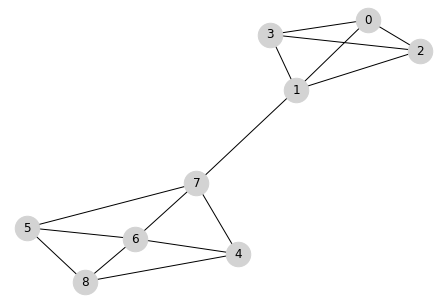

Confirmation of optimal min 0.11509982054024952
Spectral average= 0.94
Spectral max= 1.53 (1.53)
Spectral min= 0.09 (0.09)
optimal min= 0.12 [-1.000 -1.000 -1.000 -1.000 1.000 1.000 1.000 1.000 1.000]
spectral min= 0.09 [-0.398 -0.334 -0.398 -0.398 0.314 0.314 0.314 0.167 0.299]


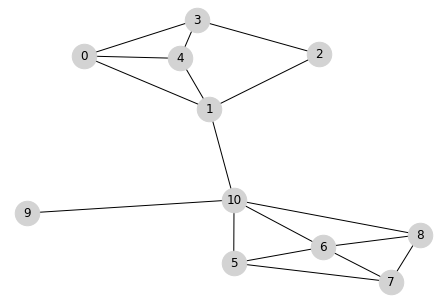

Confirmation of optimal min 0.11875635319941268
Spectral average= 0.94
Spectral max= 1.72 (1.72)
Spectral min= 0.08 (0.08)
optimal min= 0.12 [-1.000 -1.000 -1.000 -1.000 -1.000 1.000 1.000 1.000 1.000 1.000 1.000]
spectral min= 0.08 [0.351 0.315 0.275 0.376 0.351 -0.265 -0.354 -0.346 -0.265 -0.100 -0.205]


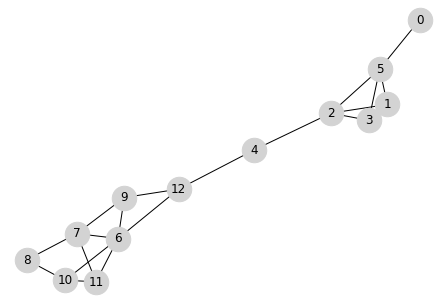

Confirmation of optimal min 0.14829902072532888
Spectral average= 0.97
Spectral max= 1.70 (1.70)
Spectral min= 0.04 (0.04)
optimal min= 0.15 [-1.000 -1.000 -1.000 -1.000 1.000 -1.000 1.000 1.000 1.000 1.000 1.000
 1.000 1.000]
spectral min= 0.04 [-0.205 -0.335 -0.331 -0.391 -0.071 -0.395 0.291 0.321 0.215 0.206 0.257
 0.254 0.119]


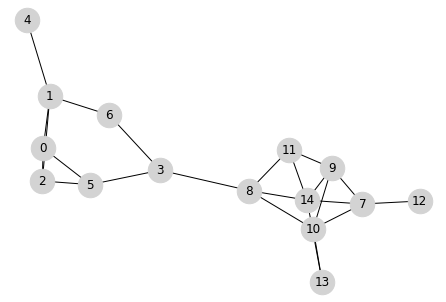

Confirmation of optimal min 0.12573742323863138
Spectral average= 0.98
Spectral max= 1.79 (1.79)
Spectral min= 0.05 (0.05)
optimal min= 0.13 [-1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 1.000 1.000 1.000 1.000
 1.000 1.000 1.000 1.000]
spectral min= 0.05 [-0.331 -0.381 -0.387 -0.138 -0.200 -0.281 -0.200 0.281 0.153 0.269 0.254
 0.205 0.147 0.188 0.283]


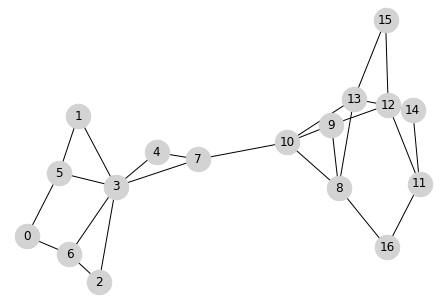

Confirmation of optimal min 0.10470692872454317
Spectral average= 1.00
Spectral max= 1.72 (1.72)
Spectral min= 0.04 (0.04)
optimal min= 0.10 [-1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 1.000 1.000 1.000
 1.000 1.000 1.000 1.000 1.000 1.000]
spectral min= 0.04 [-0.263 -0.245 -0.245 -0.378 -0.164 -0.309 -0.309 -0.119 0.229 0.195 0.145
 0.247 0.276 0.240 0.241 0.190 0.189]


In [5]:
from itertools import chain, combinations
np.set_printoptions(formatter={'float_kind':"{:.3f}".format})

for i in range(5):

    # Generate matrices
    #n1 = 3
    #m1 = 3
    #n2 = 1
    #m2 = 1
    n1 = 4 + i
    m1 = 7 + i
    n2 = 5 + i
    m2 = 9 + i
    A, labels = gen2partgraph(n1, m1, n2, m2)
    show_graph(A, labels)
    degree = A.sum(axis=0)
    D = np.zeros(A.shape)
    row, col = np.diag_indices(A.shape[0])
    D[row, col] = degree
    L = D - A
    L = normalize(L, D)

    # Brute-force
    min_xLx, x = find_min(L)
    print("Confirmation of optimal min", np.dot(np.dot(x.T, L), x)/np.dot(x.T, x))

    # Spectral
    eigenvalues, eigenvectors = np.linalg.eig(L)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]

    # Find average of eigenbasis
    sum_xLx = 0
    sum_xx = 0
    max_xLx = 0
    for k in range(eigenvectors.shape[1]):
        u = eigenvectors[:,k]
        xLx = np.dot(np.dot(u.T, L), u)
        xx = np.dot(u.T, u)
        sum_xLx += xLx
        sum_xx += xx

    print("Spectral average= {:.2f}".format(sum_xLx/sum_xx))

    max_x = eigenvectors[:,0]
    max_xLx = np.dot(np.dot(max_x, L), max_x)/np.dot(max_x, max_x)
    print("Spectral max= {:.2f} ({:.2f})".format(max_xLx, eigenvalues[0]))
    min_Sx = eigenvectors[:,-2]
    min_SxLx = np.dot(np.dot(min_Sx, L), min_Sx)/np.dot(min_Sx, min_Sx)
    print("Spectral min= {:.2f} ({:.2f})".format(min_SxLx, eigenvalues[-2]))

    print("optimal min= {:.2f}".format(min_xLx), x)
    print("spectral min= {:.2f}".format(eigenvalues[-2]), eigenvectors[:,-2])